<a href="https://colab.research.google.com/github/ramansbach/astrophysics_notebooks/blob/main/week8_ism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, matplotlib.pyplot as plt

## Radiative Transfer Equation

The radiative transfer equation states that the radiation that makes its way through the whole cloud drops exponentially:
$$
I_\lambda = I_0 e^{-\tau_\lambda} = I_0 e^{-\kappa_\lambda \rho_d s}
$$

In [ ]:
def rad_transfer(kap,rho, s, I0):
  """
  tau : float
    optical depth
  I0 : float
    initial intensity
  """
  tau = kap * rho * s
  return I0 * np.exp(-tau)

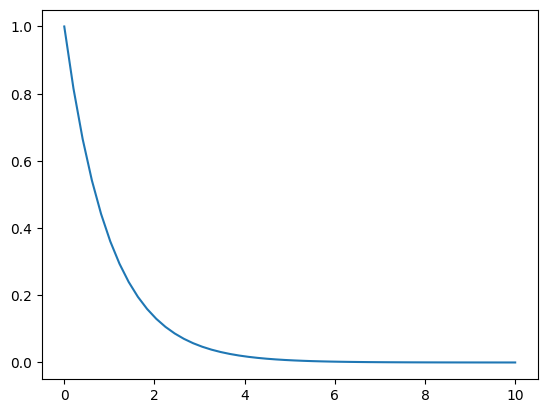

In [ ]:
kap = 1
rho = 1
s = np.linspace(0,10)
I = rad_transfer(kap,rho,s,1.0)
plt.plot(s, I)

This is the general shape of the curve for any wavelength passing through any cloud.  Let's see how it differs as we change the opacity, perhaps based on different wavelengths.

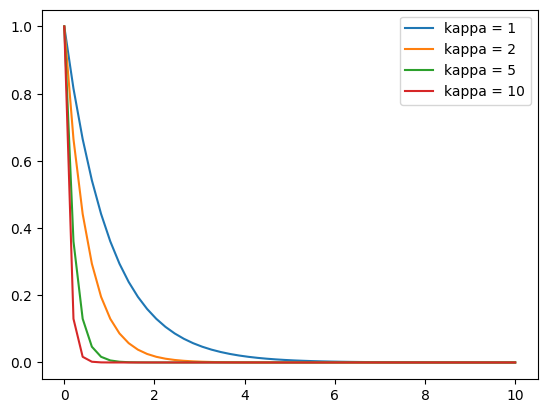

In [ ]:
kaps = np.array([1,2,5,10])
rho = 1
s = np.linspace(0,10)
for kap in kaps:
  I = rad_transfer(kap,rho,s,1.0)
  plt.plot(s, I)
plt.legend(['kappa = {}'.format(kap) for kap in kaps])

So all that changes is the rapidity with which extinction occurs.